In [20]:
# Load Dependencies

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Read in data and store them as a dictionary

file_names = [
    'merged_corr_df_.5s_epoch.csv',
    'merged_corr_df_1s_epoch.csv',
    'merged_corr_df_1.5s_epoch.csv',
    'merged_corr_df_2s_epoch.csv',
    'merged_corr_df_2.5s_epoch.csv',
    'merged_corr_df_3s_epoch.csv',
    'merged_corr_df_3.5s_epoch.csv',
    'merged_corr_df_4s_epoch.csv'
]

dataframes = {name: pd.read_csv(name) for name in file_names}


In [3]:
# Storage for multiverse model summaries

param_estimates = pd.DataFrame()
p_values = pd.DataFrame()

In [4]:
# Apply different filtering thresholds for correlation values (ranging from 0.1 to 1.0 in .1 increments)
# Then, for each filtered threshold, fit mixed models
# Then store parameter estimates and p-values in the new dataframes defined above

# Thresholds
thresholds = [x * 0.1 for x in range(1, 11)]  # 0.1 to 1.0 in increments of 0.1

for name, df in dataframes.items():
    for threshold in thresholds:
        filter_index = ((df[["TP10", "AF7", "AF8", "TP9"]] > threshold).any(1) | 
                        (df[["TP10", "AF7", "AF8", "TP9"]] < -threshold).any(1) | 
                        (df["Signal Drop"] == 1))
        filtered_df = df[~filter_index]

        # Loop through each electrode to fit a model
        for electrode in ['AF7', 'AF8', 'TP9', 'TP10']:
            model = smf.mixedlm(f"Performance ~ {electrode}", data=filtered_df, groups=filtered_df["subj"],
                                re_formula="1", vc_formula={"ses": "0 + C(ses)"})
            results = model.fit()

            # Store parameter estimates and p-values
            param_key = f"{name}_{threshold}_{electrode}"
            param_estimates.loc[param_key, 'Intercept'] = results.params['Intercept']
            param_estimates.loc[param_key, 'Electrode'] = electrode
            param_estimates.loc[param_key, 'Estimate'] = results.params[electrode]
            
            p_values.loc[param_key, 'Intercept_p'] = results.pvalues['Intercept']
            p_values.loc[param_key, 'Electrode'] = electrode
            p_values.loc[param_key, 'p_value'] = results.pvalues[electrode]

            # Print model summaries
            print(f"Results for {name}, Threshold {threshold}, Electrode {electrode}")
            print(results.summary())

Results for merged_corr_df_.5s_epoch.csv, Threshold 0.1, Electrode AF7
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 96      Method:             REML       
No. Groups:       79      Scale:              2.2139     
Min. group size:  1       Log-Likelihood:     -236.8839  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.2                                    
---------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept      6.030    0.351 17.185 0.000   5.342  6.717
AF7           -0.931    7.079 -0.131 0.895 -14.805 12.944
Group Var      6.913                                     
ses Var        0.809                                     

Results for merged_corr_df_.5s_epoch.csv, Threshold 0.1, Electrode AF8
          Mixed Linear Model Regression Results
Model: 

Results for merged_corr_df_.5s_epoch.csv, Threshold 0.30000000000000004, Electrode AF8
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 153     Method:             REML       
No. Groups:       110     Scale:              2.5342     
Min. group size:  1       Log-Likelihood:     -379.8356  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.815     0.291  20.004  0.000   5.245   6.384
AF8        -0.239     2.974  -0.080  0.936  -6.069   5.591
Group Var   6.172                                         
ses Var     1.292                                         

Results for merged_corr_df_.5s_epoch.csv, Threshold 0.30000000000000004, Electrode TP9
          Mixed 

Results for merged_corr_df_.5s_epoch.csv, Threshold 0.5, Electrode TP9
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 158     Method:             REML       
No. Groups:       112     Scale:              2.4647     
Min. group size:  1       Log-Likelihood:     -390.5952  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
---------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept      5.868    0.285 20.566 0.000   5.309  6.427
TP9           -4.236    3.144 -1.347 0.178 -10.398  1.926
Group Var      6.242                                     
ses Var        1.200                                     

Results for merged_corr_df_.5s_epoch.csv, Threshold 0.5, Electrode TP10
          Mixed Linear Model Regression Results
Model:

Results for merged_corr_df_.5s_epoch.csv, Threshold 0.7000000000000001, Electrode TP10
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 159     Method:             REML       
No. Groups:       112     Scale:              2.3791     
Min. group size:  1       Log-Likelihood:     -390.9254  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
---------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept      5.881    0.284 20.727 0.000   5.325  6.438
TP10          -8.887    3.537 -2.513 0.012 -15.820 -1.955
Group Var      6.278                                     
ses Var        1.102                                     

Results for merged_corr_df_.5s_epoch.csv, Threshold 0.8, Electrode AF7
          Mixed Linear Model Regression

Results for merged_corr_df_.5s_epoch.csv, Threshold 1.0, Electrode AF7
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 159     Method:             REML       
No. Groups:       112     Scale:              2.4582     
Min. group size:  1       Log-Likelihood:     -393.6008  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.811     0.287  20.214  0.000   5.248   6.374
AF7        -2.944     2.206  -1.334  0.182  -7.269   1.380
Group Var   6.381                                         
ses Var     1.162                                         

Results for merged_corr_df_.5s_epoch.csv, Threshold 1.0, Electrode AF8
          Mixed Linear Model Regression Results


Results for merged_corr_df_1s_epoch.csv, Threshold 0.2, Electrode AF8
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 142     Method:             REML       
No. Groups:       106     Scale:              2.3797     
Min. group size:  1       Log-Likelihood:     -351.6606  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.3                                    
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.876     0.299  19.686  0.000   5.291   6.461
AF8        -0.581     3.349  -0.173  0.862  -7.144   5.983
Group Var   6.629                                         
ses Var     1.029                                         

Results for merged_corr_df_1s_epoch.csv, Threshold 0.2, Electrode TP9
          Mixed Linear Model Regression Results
Mo

Results for merged_corr_df_1s_epoch.csv, Threshold 0.4, Electrode TP9
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 154     Method:             REML       
No. Groups:       111     Scale:              2.5079     
Min. group size:  1       Log-Likelihood:     -382.4244  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.870     0.291  20.153  0.000   5.299   6.440
TP9        -1.211     3.862  -0.314  0.754  -8.781   6.359
Group Var   6.436                                         
ses Var     1.202                                         

Results for merged_corr_df_1s_epoch.csv, Threshold 0.4, Electrode TP10
          Mixed Linear Model Regression Results
M

Results for merged_corr_df_1s_epoch.csv, Threshold 0.6000000000000001, Electrode TP10
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 157     Method:             REML       
No. Groups:       111     Scale:              2.4428     
Min. group size:  1       Log-Likelihood:     -389.1031  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.865     0.292  20.112  0.000   5.293   6.436
TP10        1.978     2.363   0.837  0.403  -2.653   6.609
Group Var   6.634                                         
ses Var     1.091                                         

Results for merged_corr_df_1s_epoch.csv, Threshold 0.7000000000000001, Electrode AF7
          Mixed Lin

Results for merged_corr_df_1s_epoch.csv, Threshold 0.9, Electrode AF7
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 157     Method:             REML       
No. Groups:       111     Scale:              2.3197     
Min. group size:  1       Log-Likelihood:     -385.7721  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.892     0.286  20.592  0.000   5.331   6.453
AF7         5.724     2.049   2.794  0.005   1.708   9.739
Group Var   6.453                                         
ses Var     1.003                                         

Results for merged_corr_df_1s_epoch.csv, Threshold 0.9, Electrode AF8
          Mixed Linear Model Regression Results
Mo

Results for merged_corr_df_1.5s_epoch.csv, Threshold 0.1, Electrode AF8
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 109     Method:             REML       
No. Groups:       85      Scale:              2.4204     
Min. group size:  1       Log-Likelihood:     -270.9151  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.3                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.976     0.339  17.615  0.000   5.311   6.640
AF8         6.390     6.598   0.969  0.333  -6.541  19.321
Group Var   6.858                                         
ses Var     1.021                                         

Results for merged_corr_df_1.5s_epoch.csv, Threshold 0.1, Electrode TP9
          Mixed Linear Model Regression Result

Results for merged_corr_df_1.5s_epoch.csv, Threshold 0.30000000000000004, Electrode TP9
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 151     Method:             REML       
No. Groups:       108     Scale:              2.4963     
Min. group size:  1       Log-Likelihood:     -373.8040  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.825     0.293  19.858  0.000   5.250   6.400
TP9         1.410     5.588   0.252  0.801  -9.542  12.363
Group Var   6.336                                         
ses Var     1.213                                         

Results for merged_corr_df_1.5s_epoch.csv, Threshold 0.30000000000000004, Electrode TP10
          Mix

Results for merged_corr_df_1.5s_epoch.csv, Threshold 0.5, Electrode TP10
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 156     Method:             REML       
No. Groups:       110     Scale:              2.4398     
Min. group size:  1       Log-Likelihood:     -384.8339  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.831     0.288  20.223  0.000   5.266   6.396
TP10        0.810     3.943   0.205  0.837  -6.918   8.537
Group Var   6.292                                         
ses Var     1.162                                         

Results for merged_corr_df_1.5s_epoch.csv, Threshold 0.6000000000000001, Electrode AF7
          Mixed Linear Model R

Results for merged_corr_df_1.5s_epoch.csv, Threshold 0.8, Electrode AF7
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 156     Method:             REML       
No. Groups:       110     Scale:              2.4500     
Min. group size:  1       Log-Likelihood:     -385.3656  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.830     0.287  20.315  0.000   5.267   6.392
AF7         0.798     2.229   0.358  0.720  -3.570   5.166
Group Var   6.215                                         
ses Var     1.191                                         

Results for merged_corr_df_1.5s_epoch.csv, Threshold 0.8, Electrode AF8
          Mixed Linear Model Regression Result

Results for merged_corr_df_1.5s_epoch.csv, Threshold 1.0, Electrode AF8
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 156     Method:             REML       
No. Groups:       110     Scale:              2.4517     
Min. group size:  1       Log-Likelihood:     -385.1882  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.821     0.287  20.291  0.000   5.258   6.383
AF8         1.196     2.546   0.470  0.639  -3.794   6.187
Group Var   6.193                                         
ses Var     1.197                                         

Results for merged_corr_df_1.5s_epoch.csv, Threshold 1.0, Electrode TP9
          Mixed Linear Model Regression Result

Results for merged_corr_df_2s_epoch.csv, Threshold 0.2, Electrode TP9
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 144     Method:             REML       
No. Groups:       105     Scale:              2.5272     
Min. group size:  1       Log-Likelihood:     -358.2254  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.946     0.302  19.668  0.000   5.354   6.539
TP9         1.361     5.794   0.235  0.814  -9.995  12.716
Group Var   6.594                                         
ses Var     1.187                                         

Results for merged_corr_df_2s_epoch.csv, Threshold 0.2, Electrode TP10
          Mixed Linear Model Regression Results
M

Results for merged_corr_df_2s_epoch.csv, Threshold 0.4, Electrode TP10
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 154     Method:             REML       
No. Groups:       109     Scale:              2.4991     
Min. group size:  1       Log-Likelihood:     -381.3903  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.896     0.293  20.103  0.000   5.321   6.470
TP10        3.006     4.018   0.748  0.454  -4.870  10.882
Group Var   6.352                                         
ses Var     1.213                                         

Results for merged_corr_df_2s_epoch.csv, Threshold 0.5, Electrode AF7
          Mixed Linear Model Regression Results
M

Results for merged_corr_df_2s_epoch.csv, Threshold 0.7000000000000001, Electrode AF7
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 155     Method:             REML       
No. Groups:       110     Scale:              2.4713     
Min. group size:  1       Log-Likelihood:     -384.1641  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.864     0.292  20.104  0.000   5.292   6.435
AF7         1.344     2.768   0.485  0.627  -4.082   6.769
Group Var   6.482                                         
ses Var     1.153                                         

Results for merged_corr_df_2s_epoch.csv, Threshold 0.7000000000000001, Electrode AF8
          Mixed Line

Results for merged_corr_df_2s_epoch.csv, Threshold 0.9, Electrode AF8
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 155     Method:             REML       
No. Groups:       110     Scale:              2.4527     
Min. group size:  1       Log-Likelihood:     -383.7091  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.854     0.291  20.115  0.000   5.284   6.425
AF8         2.974     3.030   0.981  0.326  -2.965   8.913
Group Var   6.496                                         
ses Var     1.130                                         

Results for merged_corr_df_2s_epoch.csv, Threshold 0.9, Electrode TP9
          Mixed Linear Model Regression Results
Mo

Results for merged_corr_df_2.5s_epoch.csv, Threshold 0.1, Electrode TP9
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 116     Method:             REML       
No. Groups:       88      Scale:              2.5800     
Min. group size:  1       Log-Likelihood:     -290.2815  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.3                                    
----------------------------------------------------------
           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------
Intercept  5.608     0.338  16.592  0.000    4.945   6.270
TP9        1.400     7.674   0.182  0.855  -13.641  16.441
Group Var  6.907                                          
ses Var    1.174                                          

Results for merged_corr_df_2.5s_epoch.csv, Threshold 0.1, Electrode TP10
          Mixed Linear Model Regression Resul

Results for merged_corr_df_2.5s_epoch.csv, Threshold 0.30000000000000004, Electrode TP10
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 145     Method:             REML       
No. Groups:       106     Scale:              2.5401     
Min. group size:  1       Log-Likelihood:     -360.0721  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------
Intercept  5.837     0.296  19.698  0.000    5.257   6.418
TP10       0.301     5.293   0.057  0.955  -10.074  10.675
Group Var  6.241                                          
ses Var    1.282                                          

Results for merged_corr_df_2.5s_epoch.csv, Threshold 0.4, Electrode AF7
          Mixed Linear Model 

Results for merged_corr_df_2.5s_epoch.csv, Threshold 0.6000000000000001, Electrode AF7
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 151     Method:             REML       
No. Groups:       108     Scale:              2.4810     
Min. group size:  1       Log-Likelihood:     -375.2623  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.843     0.297  19.670  0.000   5.261   6.425
AF7         1.028     2.552   0.403  0.687  -3.973   6.030
Group Var   6.655                                         
ses Var     1.126                                         

Results for merged_corr_df_2.5s_epoch.csv, Threshold 0.6000000000000001, Electrode AF8
          Mixed 

Results for merged_corr_df_2.5s_epoch.csv, Threshold 0.8, Electrode AF8
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 151     Method:             REML       
No. Groups:       108     Scale:              2.4912     
Min. group size:  1       Log-Likelihood:     -375.1717  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.826     0.298  19.566  0.000   5.242   6.409
AF8         1.586     2.491   0.637  0.524  -3.296   6.468
Group Var   6.555                                         
ses Var     1.159                                         

Results for merged_corr_df_2.5s_epoch.csv, Threshold 0.8, Electrode TP9
          Mixed Linear Model Regression Result

Results for merged_corr_df_2.5s_epoch.csv, Threshold 1.0, Electrode TP9
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 151     Method:             REML       
No. Groups:       108     Scale:              2.4155     
Min. group size:  1       Log-Likelihood:     -374.2179  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.845     0.298  19.590  0.000   5.260   6.430
TP9         4.689     3.979   1.178  0.239  -3.111  12.488
Group Var   6.887                                         
ses Var     1.012                                         

Results for merged_corr_df_2.5s_epoch.csv, Threshold 1.0, Electrode TP10
          Mixed Linear Model Regression Resul

Results for merged_corr_df_3s_epoch.csv, Threshold 0.2, Electrode TP10
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 142     Method:             REML       
No. Groups:       102     Scale:              2.4330     
Min. group size:  1       Log-Likelihood:     -352.3525  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.775     0.310  18.607  0.000   5.167   6.384
TP10        2.202     5.966   0.369  0.712  -9.492  13.896
Group Var   7.078                                         
ses Var     0.991                                         

Results for merged_corr_df_3s_epoch.csv, Threshold 0.30000000000000004, Electrode AF7
          Mixed Linear Model Regr

Results for merged_corr_df_3s_epoch.csv, Threshold 0.5, Electrode AF7
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 146     Method:             REML       
No. Groups:       106     Scale:              2.4265     
Min. group size:  1       Log-Likelihood:     -362.9789  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.870     0.305  19.227  0.000   5.271   6.468
AF7         2.853     4.159   0.686  0.493  -5.298  11.004
Group Var   7.076                                         
ses Var     0.985                                         

Results for merged_corr_df_3s_epoch.csv, Threshold 0.5, Electrode AF8
          Mixed Linear Model Regression Results
Mo

Results for merged_corr_df_3s_epoch.csv, Threshold 0.7000000000000001, Electrode AF8
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 146     Method:             REML       
No. Groups:       106     Scale:              2.4284     
Min. group size:  1       Log-Likelihood:     -363.3221  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.888     0.305  19.291  0.000   5.289   6.486
AF8        -1.262     3.497  -0.361  0.718  -8.117   5.592
Group Var   7.114                                         
ses Var     0.980                                         

Results for merged_corr_df_3s_epoch.csv, Threshold 0.7000000000000001, Electrode TP9
          Mixed Line

Results for merged_corr_df_3s_epoch.csv, Threshold 0.9, Electrode TP9
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 146     Method:             REML       
No. Groups:       106     Scale:              2.4103     
Min. group size:  1       Log-Likelihood:     -362.3726  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.866     0.306  19.178  0.000   5.267   6.466
TP9         5.624     6.899   0.815  0.415  -7.897  19.146
Group Var   7.143                                         
ses Var     0.957                                         

Results for merged_corr_df_3s_epoch.csv, Threshold 0.9, Electrode TP10
          Mixed Linear Model Regression Results
M

Results for merged_corr_df_3.5s_epoch.csv, Threshold 0.1, Electrode TP10
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 122     Method:             REML       
No. Groups:       90      Scale:              2.6893     
Min. group size:  1       Log-Likelihood:     -307.8245  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
---------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept      5.966    0.344 17.330 0.000   5.291  6.640
TP10          -4.669    9.473 -0.493 0.622 -23.236 13.898
Group Var      7.529                                     
ses Var        1.155                                     

Results for merged_corr_df_3.5s_epoch.csv, Threshold 0.2, Electrode AF7
          Mixed Linear Model Regression Results
Mode

Results for merged_corr_df_3.5s_epoch.csv, Threshold 0.4, Electrode AF7
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 142     Method:             REML       
No. Groups:       103     Scale:              2.4530     
Min. group size:  1       Log-Likelihood:     -353.9248  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.875     0.312  18.841  0.000   5.264   6.486
AF7         0.946     4.260   0.222  0.824  -7.402   9.295
Group Var   7.245                                         
ses Var     0.978                                         

Results for merged_corr_df_3.5s_epoch.csv, Threshold 0.4, Electrode AF8
          Mixed Linear Model Regression Result

Results for merged_corr_df_3.5s_epoch.csv, Threshold 0.6000000000000001, Electrode AF8
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 142     Method:             REML       
No. Groups:       103     Scale:              2.4057     
Min. group size:  1       Log-Likelihood:     -353.0711  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.844     0.312  18.733  0.000   5.233   6.455
AF8         5.686     4.332   1.313  0.189  -2.804  14.176
Group Var   7.271                                         
ses Var     0.927                                         

Results for merged_corr_df_3.5s_epoch.csv, Threshold 0.6000000000000001, Electrode TP9
          Mixed 

Results for merged_corr_df_3.5s_epoch.csv, Threshold 0.8, Electrode TP9
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 142     Method:             REML       
No. Groups:       103     Scale:              2.4415     
Min. group size:  1       Log-Likelihood:     -353.4380  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
---------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept      5.873    0.312 18.842 0.000   5.262  6.484
TP9           -3.723    5.754 -0.647 0.518 -15.000  7.555
Group Var      7.256                                     
ses Var        0.965                                     

Results for merged_corr_df_3.5s_epoch.csv, Threshold 0.8, Electrode TP10
          Mixed Linear Model Regression Results
Mode

Results for merged_corr_df_3.5s_epoch.csv, Threshold 1.0, Electrode TP10
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 142     Method:             REML       
No. Groups:       103     Scale:              2.4630     
Min. group size:  1       Log-Likelihood:     -353.5848  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.857     0.311  18.830  0.000   5.247   6.467
TP10        3.534     4.599   0.768  0.442  -5.481  12.549
Group Var   7.101                                         
ses Var     1.017                                         

Results for merged_corr_df_4s_epoch.csv, Threshold 0.1, Electrode AF7
          Mixed Linear Model Regression Results

Results for merged_corr_df_4s_epoch.csv, Threshold 0.30000000000000004, Electrode AF7
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 139     Method:             REML       
No. Groups:       100     Scale:              2.6861     
Min. group size:  1       Log-Likelihood:     -348.4897  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
---------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept      5.814    0.315 18.479 0.000   5.197  6.431
AF7           -2.158    5.661 -0.381 0.703 -13.254  8.938
Group Var      6.659                                     
ses Var        1.342                                     

Results for merged_corr_df_4s_epoch.csv, Threshold 0.30000000000000004, Electrode AF8
          Mixed Linear Mo

Results for merged_corr_df_4s_epoch.csv, Threshold 0.5, Electrode AF8
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 139     Method:             REML       
No. Groups:       100     Scale:              2.6952     
Min. group size:  1       Log-Likelihood:     -348.5439  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   5.783     0.317  18.267  0.000   5.162   6.403
AF8         2.592     5.058   0.512  0.608  -7.322  12.507
Group Var   6.583                                         
ses Var     1.370                                         

Results for merged_corr_df_4s_epoch.csv, Threshold 0.5, Electrode TP9
          Mixed Linear Model Regression Results
Mo

Results for merged_corr_df_4s_epoch.csv, Threshold 0.7000000000000001, Electrode TP9
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 139     Method:             REML       
No. Groups:       100     Scale:              2.6296     
Min. group size:  1       Log-Likelihood:     -347.6376  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
---------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept      5.843    0.316 18.504 0.000   5.224  6.461
TP9           -8.429    7.001 -1.204 0.229 -22.150  5.292
Group Var      6.794                                     
ses Var        1.252                                     

Results for merged_corr_df_4s_epoch.csv, Threshold 0.7000000000000001, Electrode TP10
          Mixed Linear Mod

Results for merged_corr_df_4s_epoch.csv, Threshold 0.9, Electrode TP10
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Performance
No. Observations: 140     Method:             REML       
No. Groups:       100     Scale:              2.6181     
Min. group size:  1       Log-Likelihood:     -349.6696  
Max. group size:  3       Converged:          Yes        
Mean group size:  1.4                                    
---------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept      5.814    0.314 18.513 0.000   5.199  6.430
TP10          -7.837    7.324 -1.070 0.285 -22.191  6.518
Group Var      6.807                                     
ses Var        1.235                                     

Results for merged_corr_df_4s_epoch.csv, Threshold 1.0, Electrode AF7
          Mixed Linear Model Regression Results
Model:  

In [40]:
# Save the results dataframes to csv

param_estimates.to_csv("parameter_estimates.csv")
p_values.to_csv("p_values.csv")

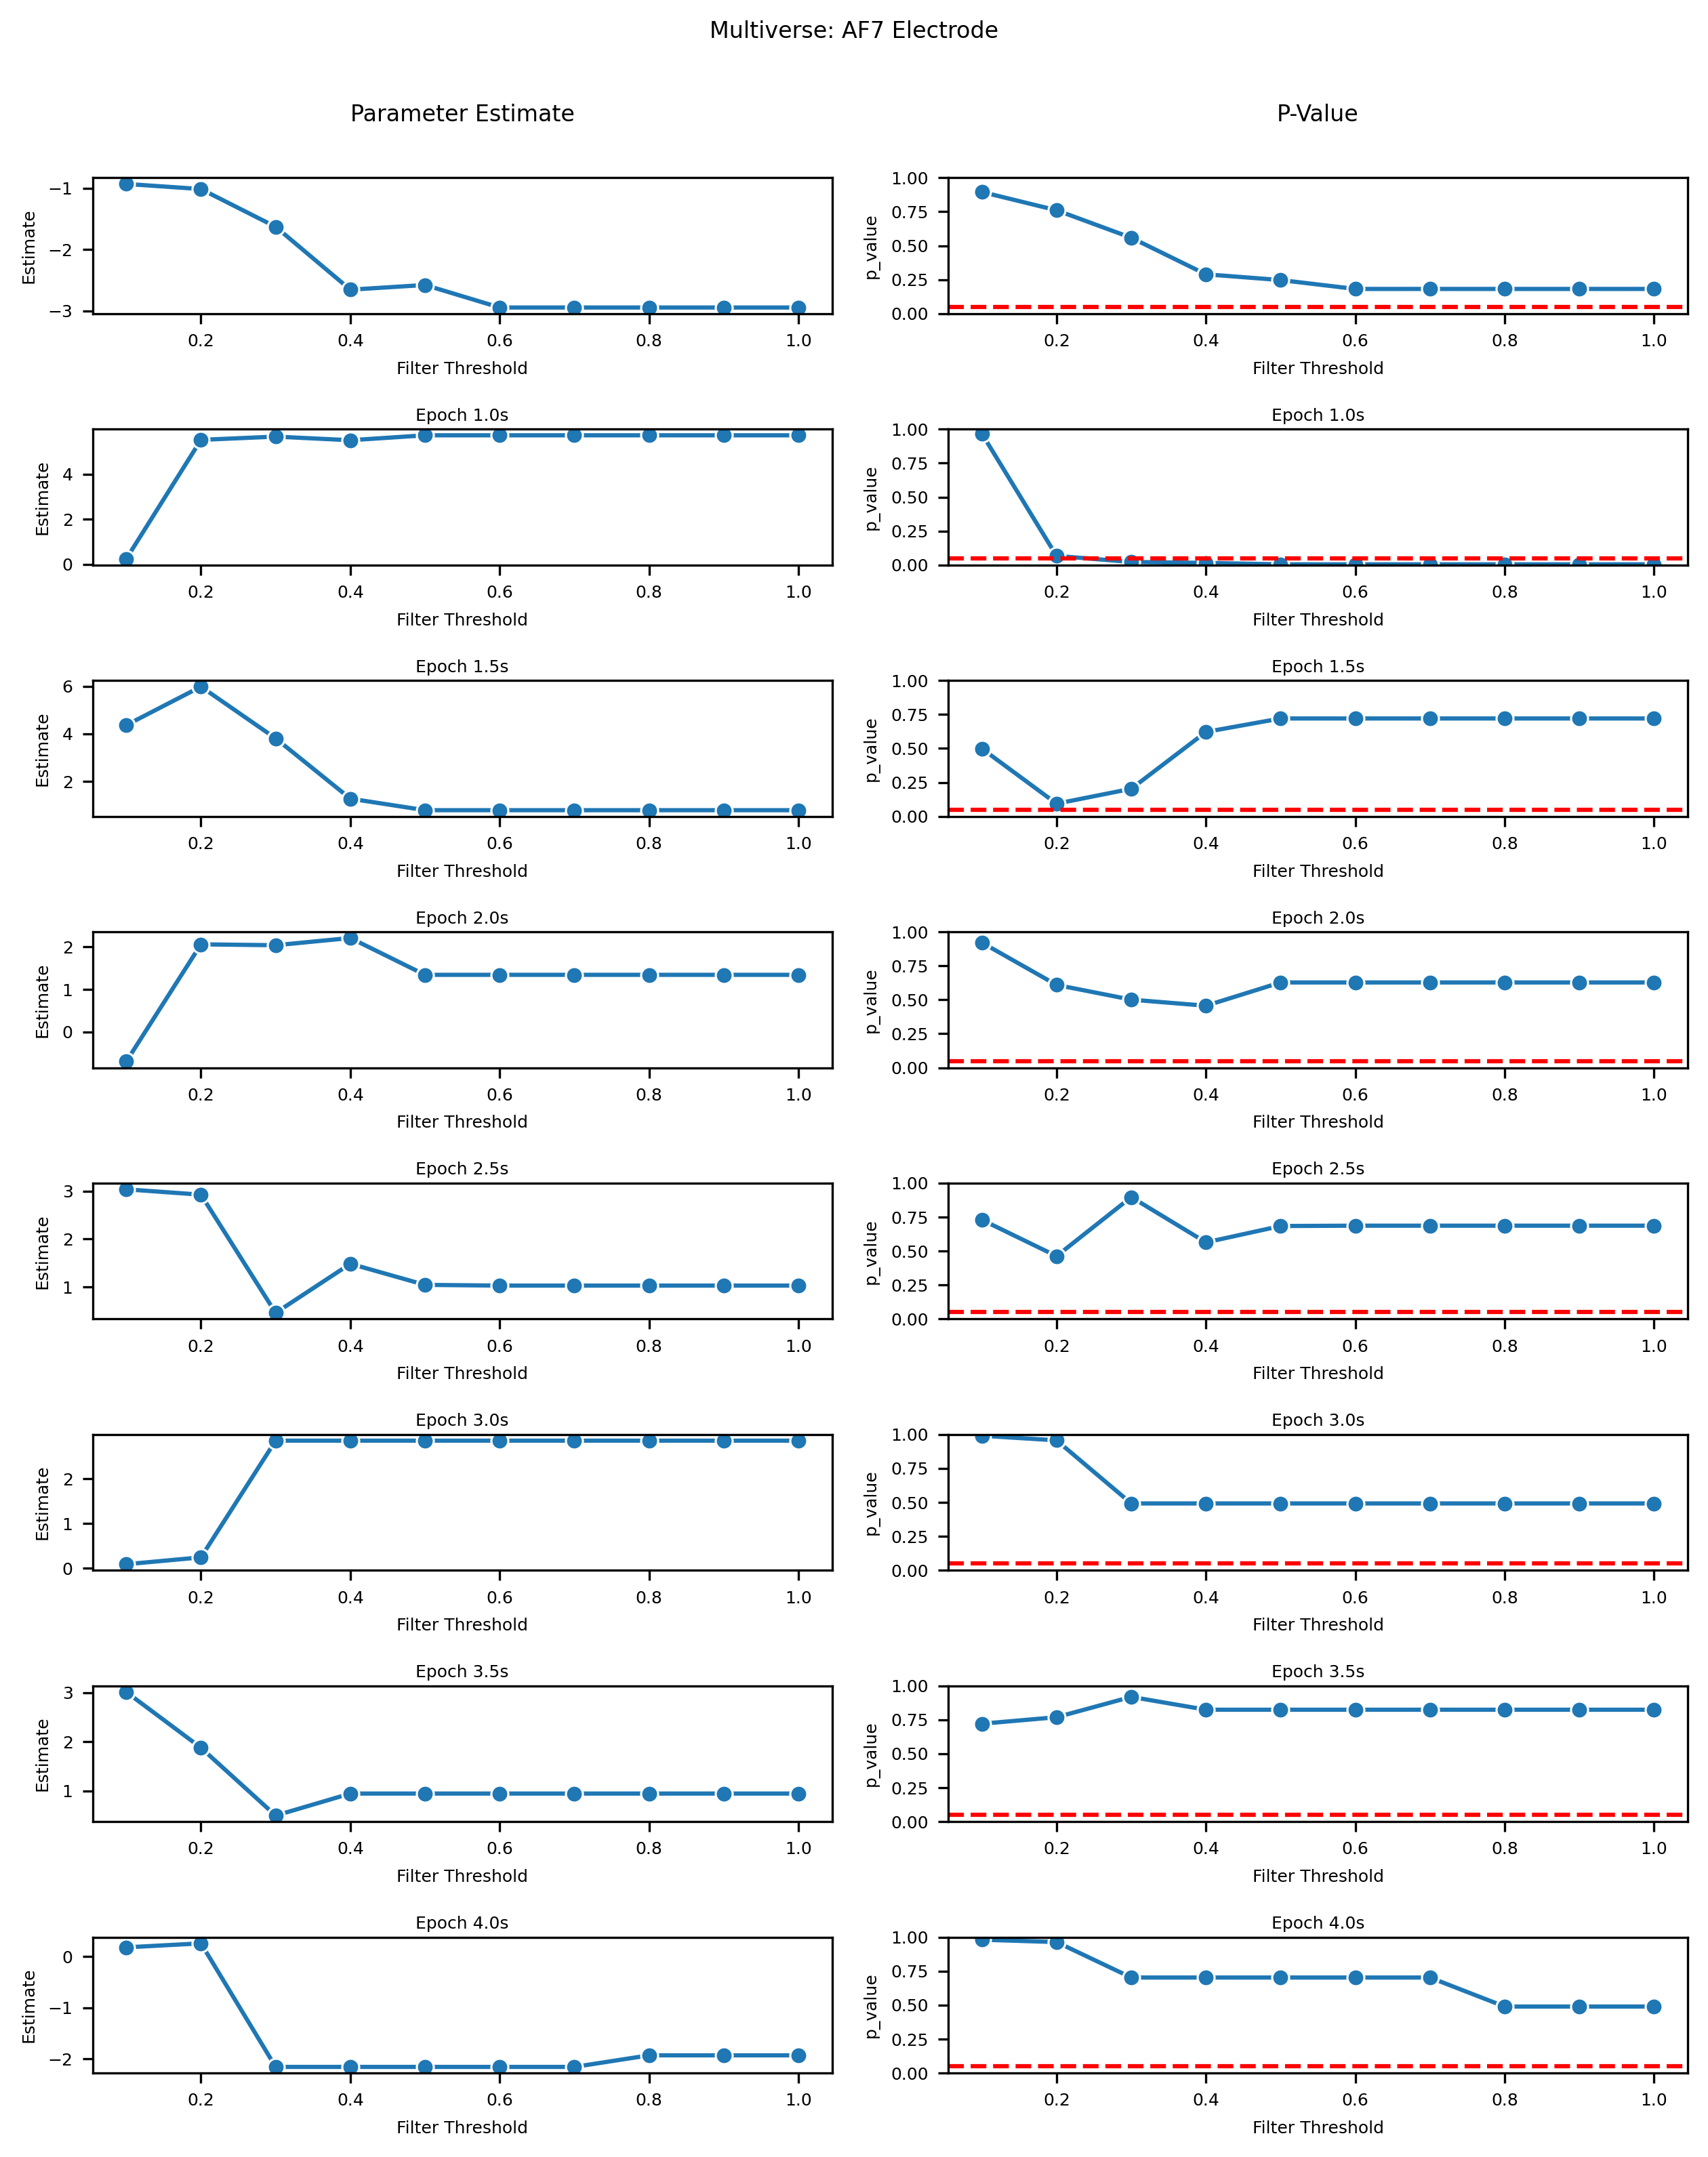

In [36]:
# Multiverse plot for AF7

# Regex to capture fractional seconds like .5s as 0.5
def extract_numeric_part(dataset_name):
    match = re.search(r'(\d+(\.\d+)?|\.5)s', dataset_name)
    if match:
        return float(match.group(1))
    return 0  # Default if no number found

# Extract datasets and thresholds
try:
    dataset_names = set('_'.join(idx.split('_')[:-2]) for idx in param_estimates.index)
    dataset_names = sorted(dataset_names, key=extract_numeric_part)
    thresholds = sorted(set(float(idx.split('_')[-2]) for idx in param_estimates.index))
except ValueError as e:
    print(f"Error parsing index: {e}")
    print("Sample problematic indices:", param_estimates.index[:5])

# Define a small font size for text (helps make plots bigger)
tiny_font_size = 6
smaller_font_size = 8  # For super title and column titles

fig, axes = plt.subplots(nrows=len(dataset_names), ncols=2, figsize=(8.5, 11), dpi=300)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Reduce the super title padding
fig.suptitle("Multiverse: AF7 Electrode", fontsize=smaller_font_size, va='bottom')

for i, dataset in enumerate(dataset_names):
    epoch_value = f"{extract_numeric_part(dataset)}s"
    for j, df in enumerate([param_estimates, p_values]):
        filtered_data = df[df['Electrode'] == 'AF7']
        filtered_data = filtered_data[filtered_data.index.str.contains(dataset)]
        filtered_data['Threshold'] = filtered_data.index.map(lambda x: float(x.split('_')[-2]))

        y_column = 'Estimate' if 'Estimate' in df.columns else 'p_value'
        ax = sns.lineplot(x='Threshold', y=y_column, data=filtered_data, ax=axes[i, j], marker='o')
        ax.set_title(f"Epoch {epoch_value}", fontsize=tiny_font_size, pad=3)
        ax.set_xlabel('Filter Threshold', fontsize=tiny_font_size)
        ax.set_ylabel(y_column, fontsize=tiny_font_size)
        ax.tick_params(labelsize=tiny_font_size)

        if j == 1:  # P-value column specific adjustments
            ax.set_ylim(0, 1)
            ax.axhline(0.05, color='red', linestyle='--')

# Set column titles above the columns, outside the plots
axes[0, 0].set_title("Parameter Estimate", fontsize=smaller_font_size, pad=20)
axes[0, 1].set_title("P-Value", fontsize=smaller_font_size, pad=20)

# Tighten the layout with reduced padding for super title
plt.tight_layout(rect=[0, 0.03, 1, 0.99])

# Saving the figure with adjusted parameters
plt.savefig('parameter_estimates_and_p_values_af7.png', 
            format='png', 
            bbox_inches='tight', 
            facecolor='white', 
            edgecolor='none')
plt.show()

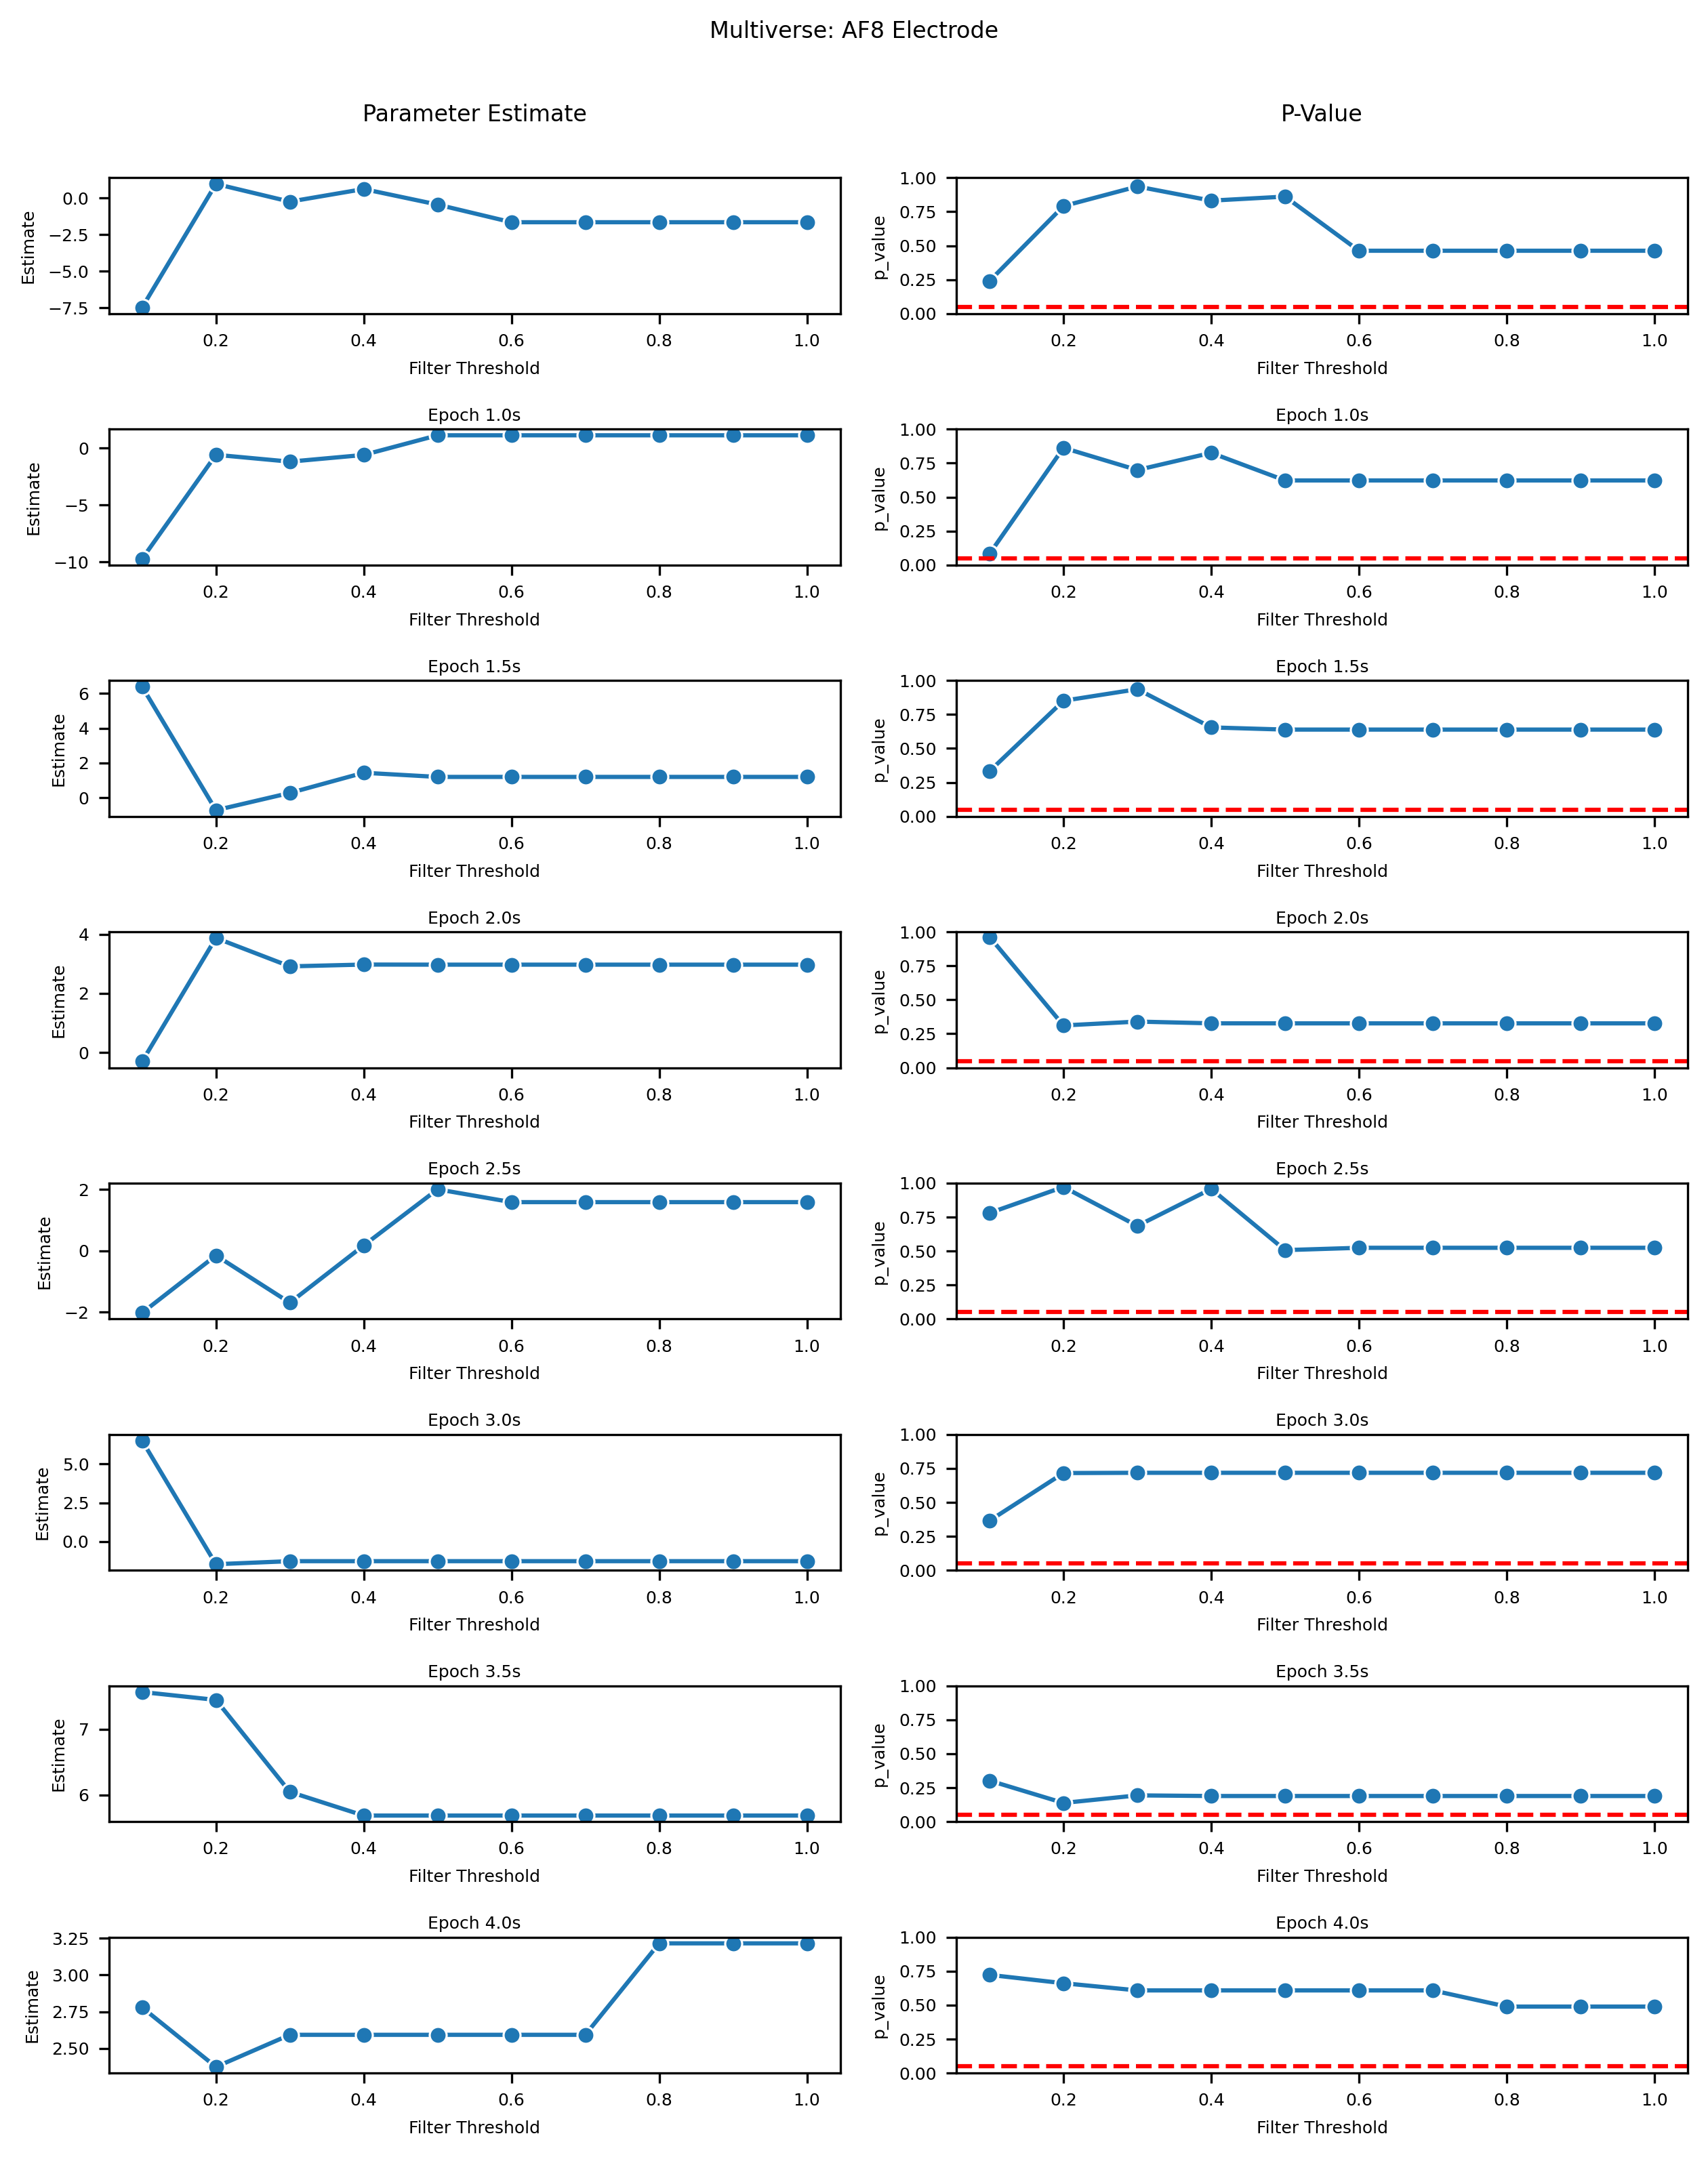

In [37]:
# Multiverse plot for AF8

# Regex to capture fractional seconds like .5s as 0.5
def extract_numeric_part(dataset_name):
    match = re.search(r'(\d+(\.\d+)?|\.5)s', dataset_name)
    if match:
        return float(match.group(1))
    return 0  # Default if no number found

# Extract datasets and thresholds
try:
    dataset_names = set('_'.join(idx.split('_')[:-2]) for idx in param_estimates.index)
    dataset_names = sorted(dataset_names, key=extract_numeric_part)
    thresholds = sorted(set(float(idx.split('_')[-2]) for idx in param_estimates.index))
except ValueError as e:
    print(f"Error parsing index: {e}")
    print("Sample problematic indices:", param_estimates.index[:5])

# Define a small font size for text (helps make plots bigger)
tiny_font_size = 6
smaller_font_size = 8  # For super title and column titles

fig, axes = plt.subplots(nrows=len(dataset_names), ncols=2, figsize=(8.5, 11), dpi=300)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Reduce the super title padding
fig.suptitle("Multiverse: AF8 Electrode", fontsize=smaller_font_size, va='bottom')

for i, dataset in enumerate(dataset_names):
    epoch_value = f"{extract_numeric_part(dataset)}s"
    for j, df in enumerate([param_estimates, p_values]):
        filtered_data = df[df['Electrode'] == 'AF8']
        filtered_data = filtered_data[filtered_data.index.str.contains(dataset)]
        filtered_data['Threshold'] = filtered_data.index.map(lambda x: float(x.split('_')[-2]))

        y_column = 'Estimate' if 'Estimate' in df.columns else 'p_value'
        ax = sns.lineplot(x='Threshold', y=y_column, data=filtered_data, ax=axes[i, j], marker='o')
        ax.set_title(f"Epoch {epoch_value}", fontsize=tiny_font_size, pad=3)
        ax.set_xlabel('Filter Threshold', fontsize=tiny_font_size)
        ax.set_ylabel(y_column, fontsize=tiny_font_size)
        ax.tick_params(labelsize=tiny_font_size)

        if j == 1:  # P-value column specific adjustments
            ax.set_ylim(0, 1)
            ax.axhline(0.05, color='red', linestyle='--')

# Set column titles above the columns, outside the plots
axes[0, 0].set_title("Parameter Estimate", fontsize=smaller_font_size, pad=20)
axes[0, 1].set_title("P-Value", fontsize=smaller_font_size, pad=20)

# Tighten the layout with reduced padding for super title
plt.tight_layout(rect=[0, 0.03, 1, 0.99])

# Saving the figure with adjusted parameters
plt.savefig('parameter_estimates_and_p_values_af8.png', 
            format='png', 
            bbox_inches='tight', 
            facecolor='white', 
            edgecolor='none')
plt.show()

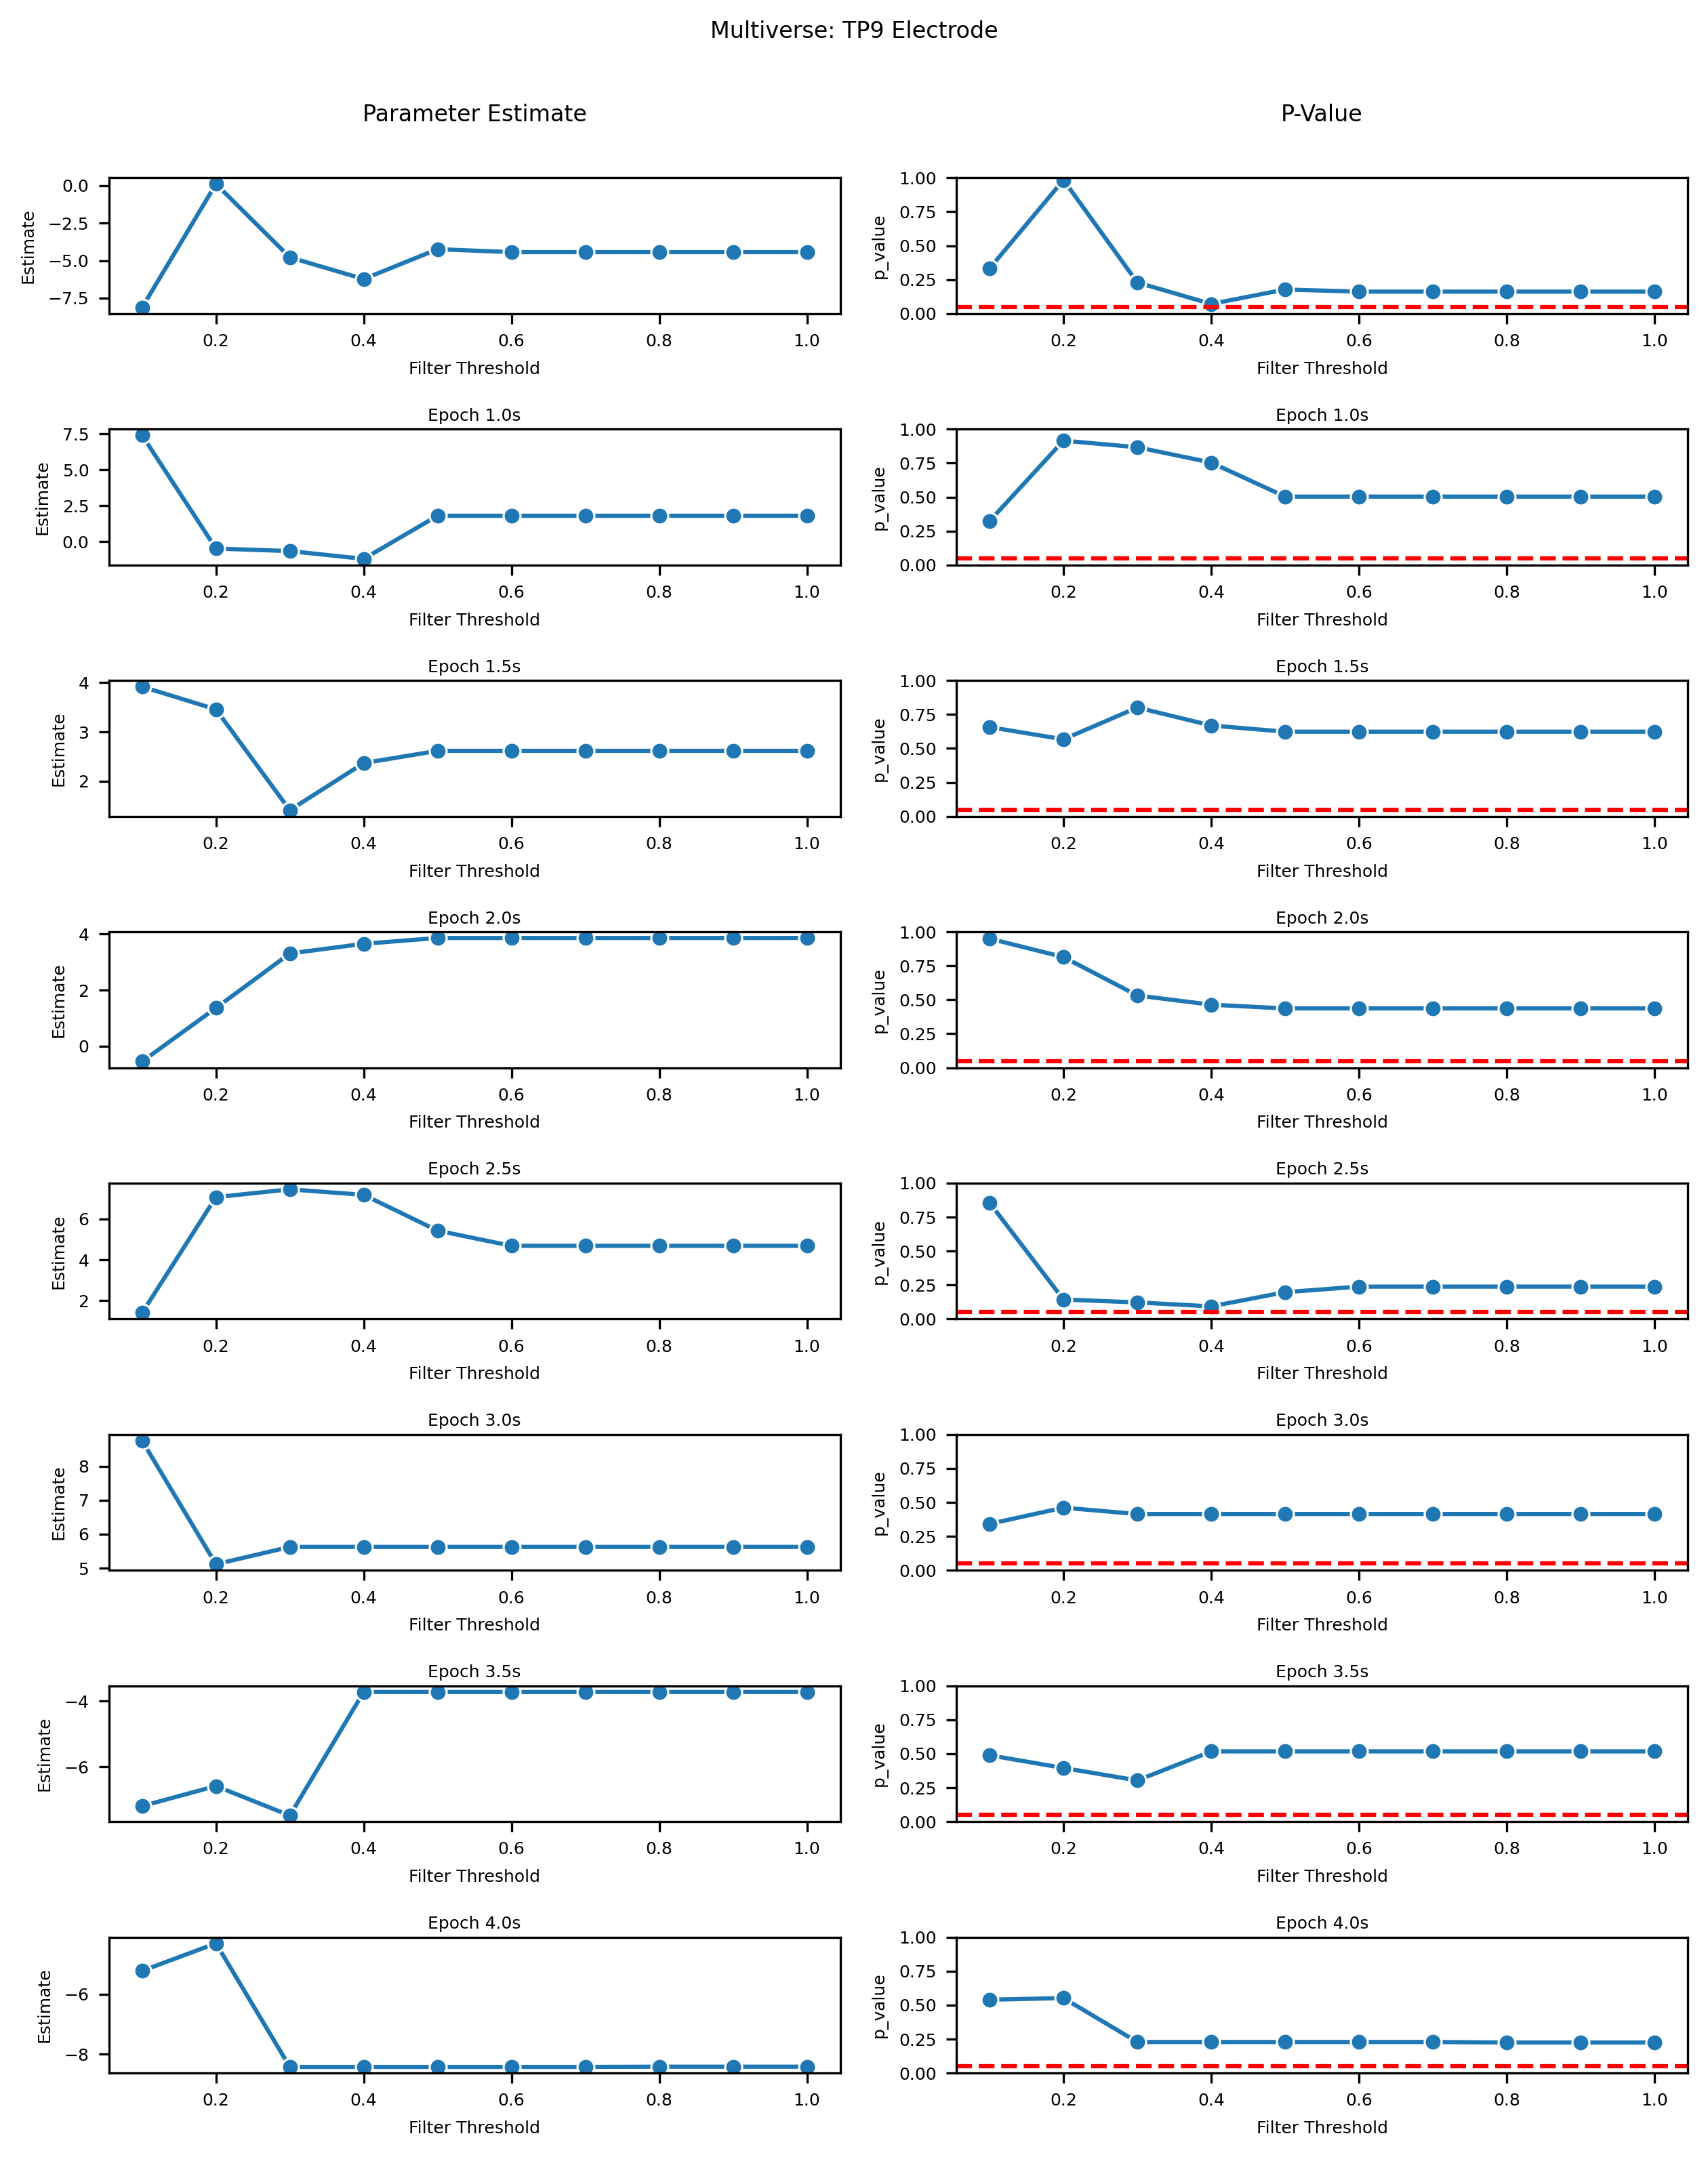

In [41]:
# Multiverse plot for TP9

# Regex to capture fractional seconds like .5s as 0.5
def extract_numeric_part(dataset_name):
    match = re.search(r'(\d+(\.\d+)?|\.5)s', dataset_name)
    if match:
        return float(match.group(1))
    return 0  # Default if no number found

# Extract datasets and thresholds
try:
    dataset_names = set('_'.join(idx.split('_')[:-2]) for idx in param_estimates.index)
    dataset_names = sorted(dataset_names, key=extract_numeric_part)
    thresholds = sorted(set(float(idx.split('_')[-2]) for idx in param_estimates.index))
except ValueError as e:
    print(f"Error parsing index: {e}")
    print("Sample problematic indices:", param_estimates.index[:5])

# Define a small font size for text (helps make plots bigger)
tiny_font_size = 6
smaller_font_size = 8  # For super title and column titles

fig, axes = plt.subplots(nrows=len(dataset_names), ncols=2, figsize=(8.5, 11), dpi=300)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Reduce the super title padding
fig.suptitle("Multiverse: TP9 Electrode", fontsize=smaller_font_size, va='bottom')

for i, dataset in enumerate(dataset_names):
    epoch_value = f"{extract_numeric_part(dataset)}s"
    for j, df in enumerate([param_estimates, p_values]):
        filtered_data = df[df['Electrode'] == 'TP9']
        filtered_data = filtered_data[filtered_data.index.str.contains(dataset)]
        filtered_data['Threshold'] = filtered_data.index.map(lambda x: float(x.split('_')[-2]))

        y_column = 'Estimate' if 'Estimate' in df.columns else 'p_value'
        ax = sns.lineplot(x='Threshold', y=y_column, data=filtered_data, ax=axes[i, j], marker='o')
        ax.set_title(f"Epoch {epoch_value}", fontsize=tiny_font_size, pad=3)
        ax.set_xlabel('Filter Threshold', fontsize=tiny_font_size)
        ax.set_ylabel(y_column, fontsize=tiny_font_size)
        ax.tick_params(labelsize=tiny_font_size)

        if j == 1:  # P-value column specific adjustments
            ax.set_ylim(0, 1)
            ax.axhline(0.05, color='red', linestyle='--')

# Set column titles above the columns, outside the plots
axes[0, 0].set_title("Parameter Estimate", fontsize=smaller_font_size, pad=20)
axes[0, 1].set_title("P-Value", fontsize=smaller_font_size, pad=20)

# Tighten the layout with reduced padding for super title
plt.tight_layout(rect=[0, 0.03, 1, 0.99])

# Saving the figure with adjusted parameters
plt.savefig('parameter_estimates_and_p_values_tp9.png', 
            format='png', 
            bbox_inches='tight', 
            facecolor='white', 
            edgecolor='none')
plt.show()

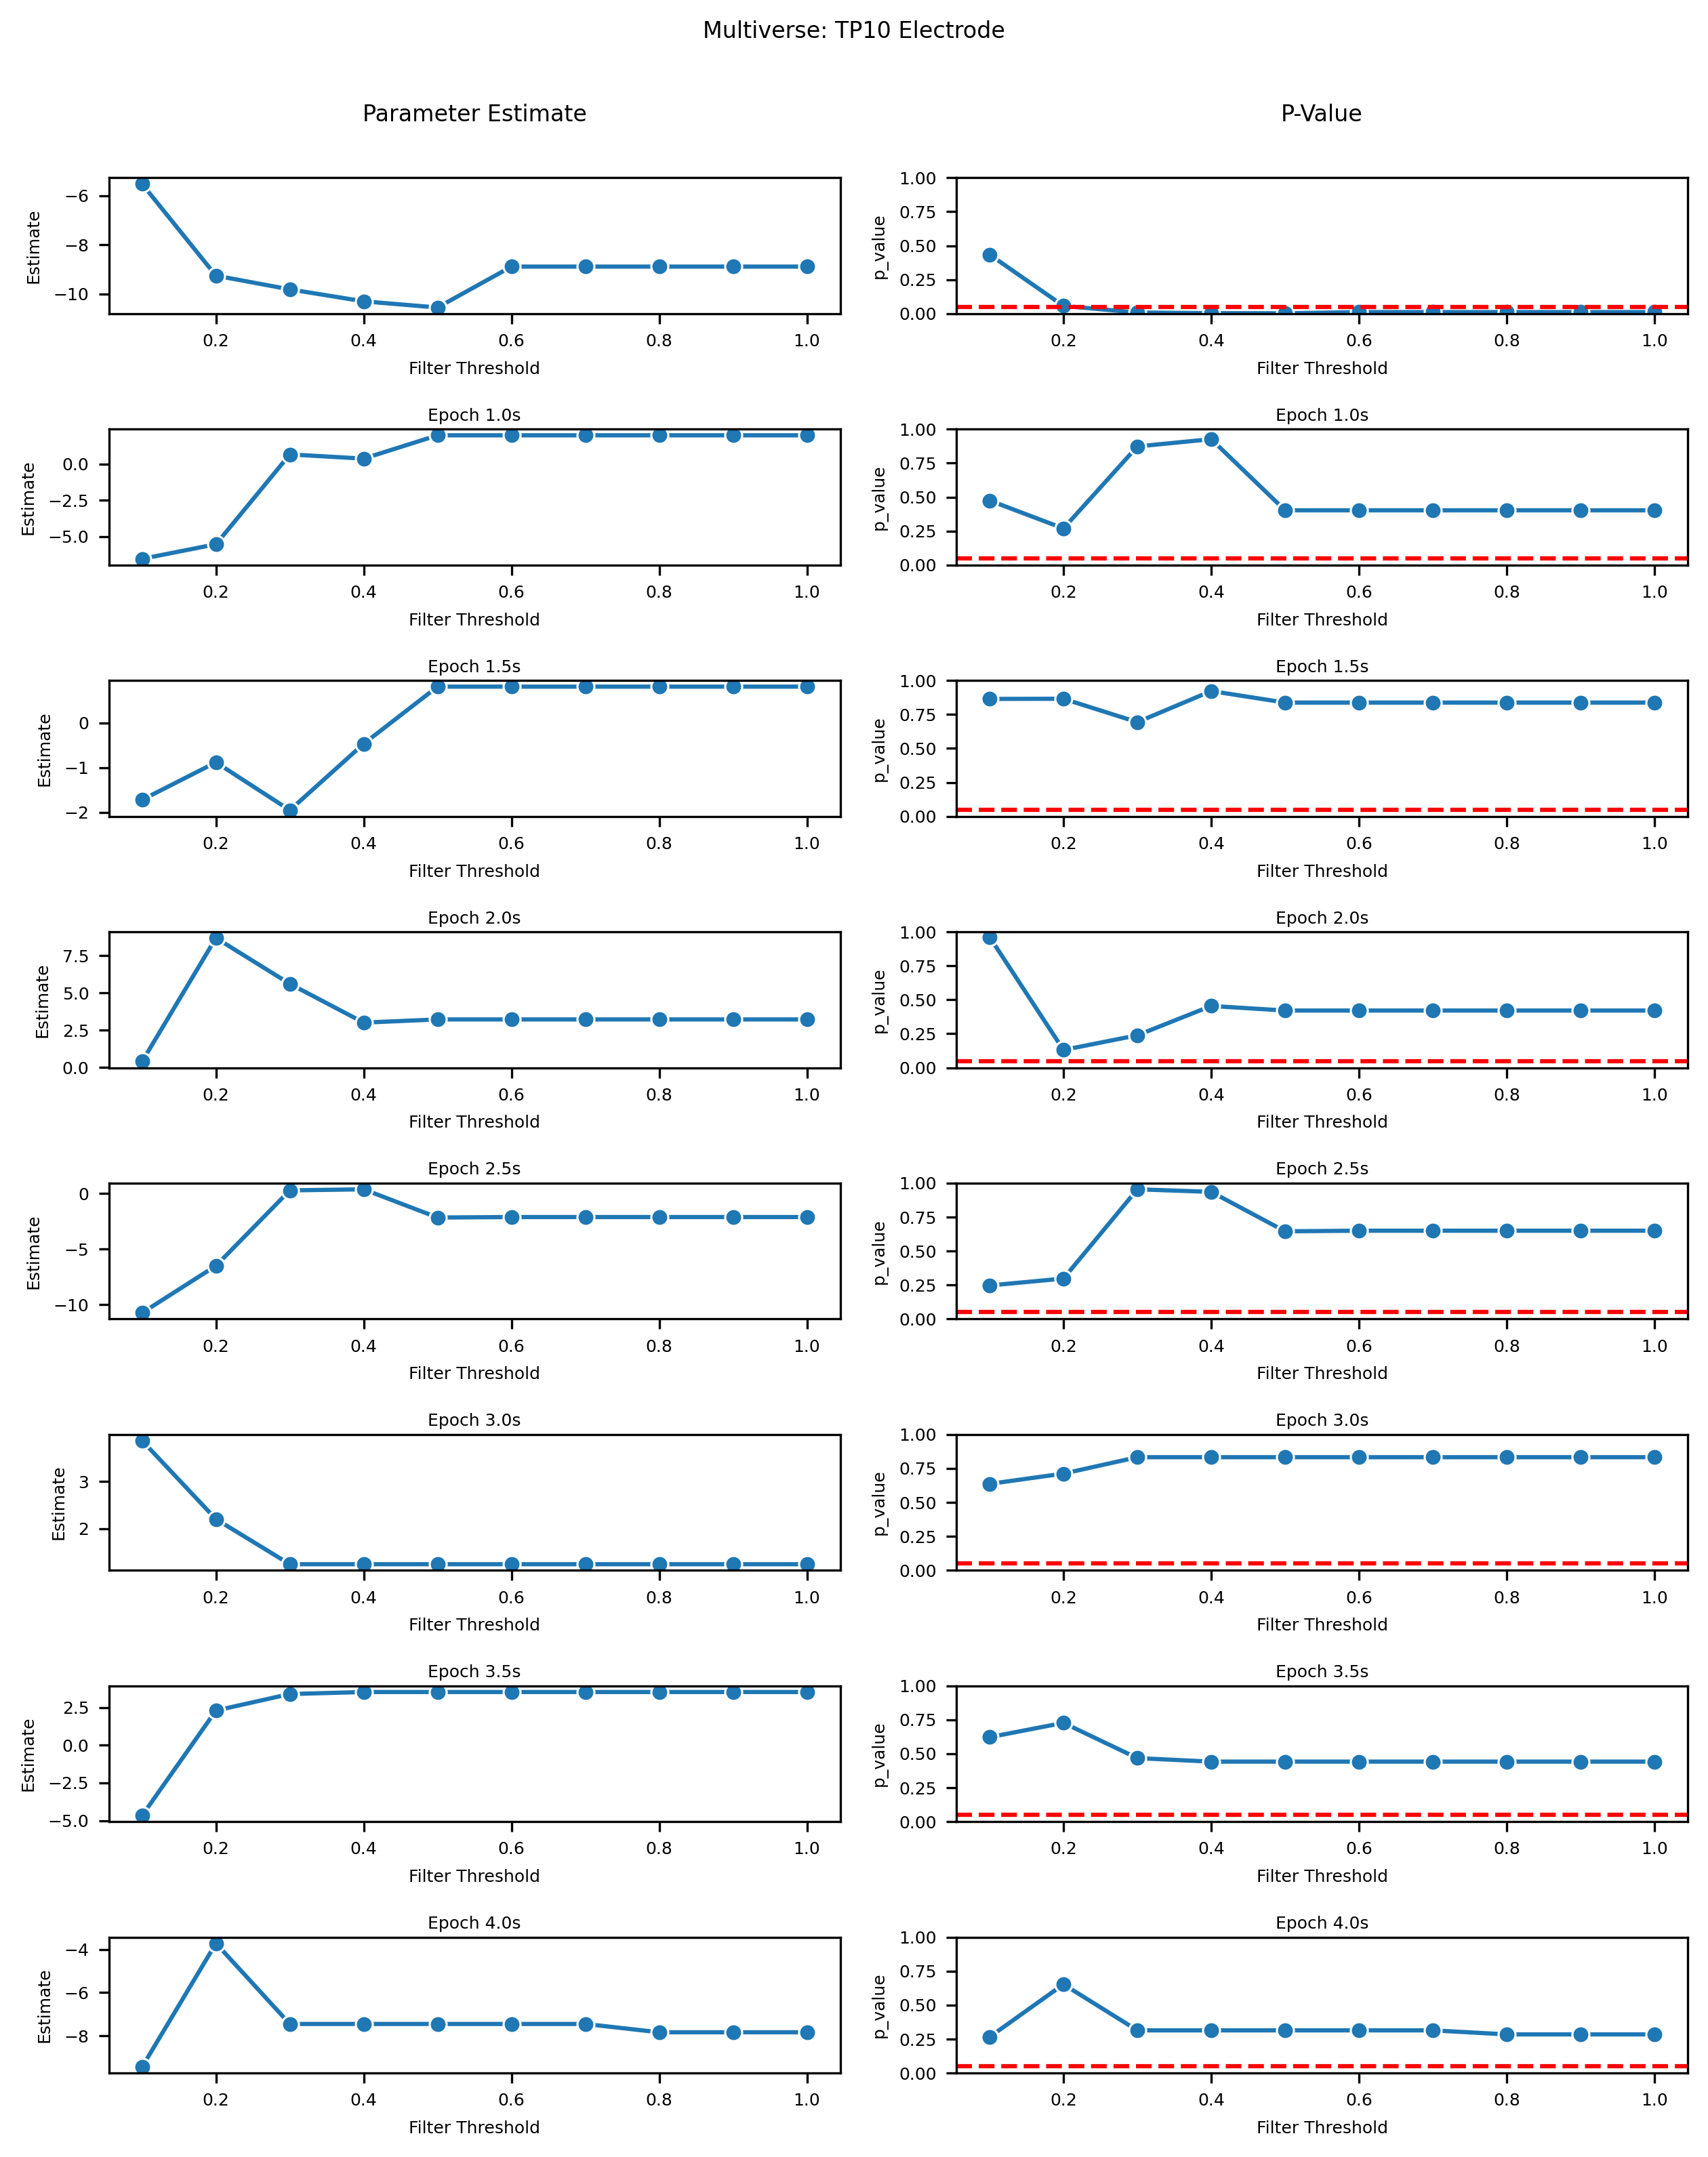

In [42]:
# Multiverse plot for TP10

# Regex to capture fractional seconds like .5s as 0.5
def extract_numeric_part(dataset_name):
    match = re.search(r'(\d+(\.\d+)?|\.5)s', dataset_name)
    if match:
        return float(match.group(1))
    return 0  # Default if no number found

# Extract datasets and thresholds
try:
    dataset_names = set('_'.join(idx.split('_')[:-2]) for idx in param_estimates.index)
    dataset_names = sorted(dataset_names, key=extract_numeric_part)
    thresholds = sorted(set(float(idx.split('_')[-2]) for idx in param_estimates.index))
except ValueError as e:
    print(f"Error parsing index: {e}")
    print("Sample problematic indices:", param_estimates.index[:5])

# Define a small font size for text (helps make plots bigger)
tiny_font_size = 6
smaller_font_size = 8  # For super title and column titles

fig, axes = plt.subplots(nrows=len(dataset_names), ncols=2, figsize=(8.5, 11), dpi=300)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Reduce the super title padding
fig.suptitle("Multiverse: TP10 Electrode", fontsize=smaller_font_size, va='bottom')

for i, dataset in enumerate(dataset_names):
    epoch_value = f"{extract_numeric_part(dataset)}s"
    for j, df in enumerate([param_estimates, p_values]):
        filtered_data = df[df['Electrode'] == 'TP10']
        filtered_data = filtered_data[filtered_data.index.str.contains(dataset)]
        filtered_data['Threshold'] = filtered_data.index.map(lambda x: float(x.split('_')[-2]))

        y_column = 'Estimate' if 'Estimate' in df.columns else 'p_value'
        ax = sns.lineplot(x='Threshold', y=y_column, data=filtered_data, ax=axes[i, j], marker='o')
        ax.set_title(f"Epoch {epoch_value}", fontsize=tiny_font_size, pad=3)
        ax.set_xlabel('Filter Threshold', fontsize=tiny_font_size)
        ax.set_ylabel(y_column, fontsize=tiny_font_size)
        ax.tick_params(labelsize=tiny_font_size)

        if j == 1:  # P-value column specific adjustments
            ax.set_ylim(0, 1)
            ax.axhline(0.05, color='red', linestyle='--')

# Set column titles above the columns, outside the plots
axes[0, 0].set_title("Parameter Estimate", fontsize=smaller_font_size, pad=20)
axes[0, 1].set_title("P-Value", fontsize=smaller_font_size, pad=20)

# Tighten the layout with reduced padding for super title
plt.tight_layout(rect=[0, 0.03, 1, 0.99])

# Saving the figure with adjusted parameters
plt.savefig('parameter_estimates_and_p_values_tp10.png', 
            format='png', 
            bbox_inches='tight', 
            facecolor='white', 
            edgecolor='none')
plt.show()